<a href="https://colab.research.google.com/github/WiltshireWizard/Apple_Variety_Classification/blob/master/Apple_Varieties_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from  google.colab import drive

In [3]:
from fastai import *

In [4]:
from fastai.vision import *

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
proj_path = 'gdrive/My Drive/Apple Varieties/'

In [7]:
p_path = Path(proj_path)

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

      

In [9]:
data.classes

['braeburn', 'bramley', 'cox', 'gala', 'russet']

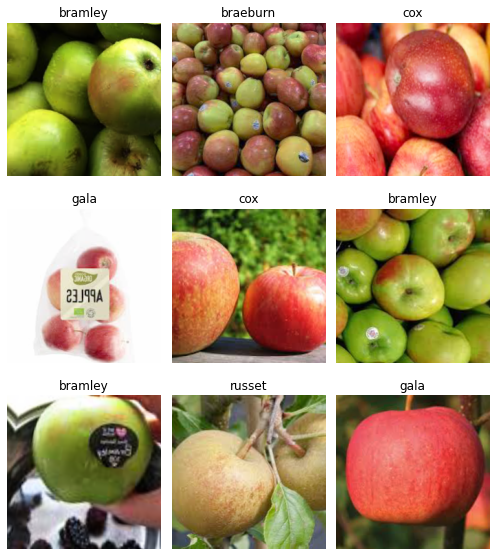

In [ ]:
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.c, len(data.train_ds), len(data.valid_ds)

(5, 563, 241)

In [10]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [11]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.468925,1.483703,0.597510,03:05
1,2.001740,0.922914,0.323651,02:26
2,1.628756,0.939963,0.307054,02:28
3,1.356179,0.996380,0.307054,02:26
4,1.180291,1.026124,0.298755,02:25
5,1.017883,0.995949,0.278008,02:25
6,0.919533,0.982166,0.278008,02:30
7,0.836962,0.971937,0.286307,02:26


In [12]:
learn.save('Apples_model1_34', return_path=True)

PosixPath('gdrive/My Drive/Apple Varieties/models/Apples_model1_34.pth')

In [13]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


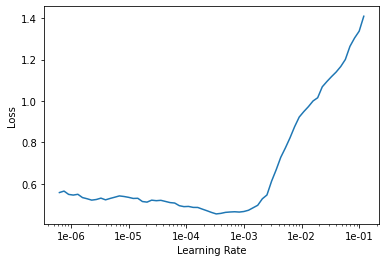

In [14]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [19]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.202099,1.112569,0.232365,03:19
1,0.179316,1.110950,0.232365,03:15


In [20]:
learn.save('Apple_model2_34')

In [21]:
learn.load('Apple_model2_34')
interp = ClassificationInterpretation.from_learner(learn)

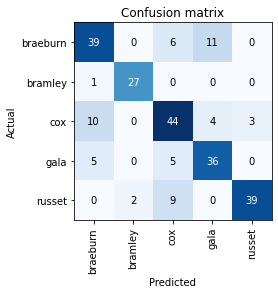

In [22]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

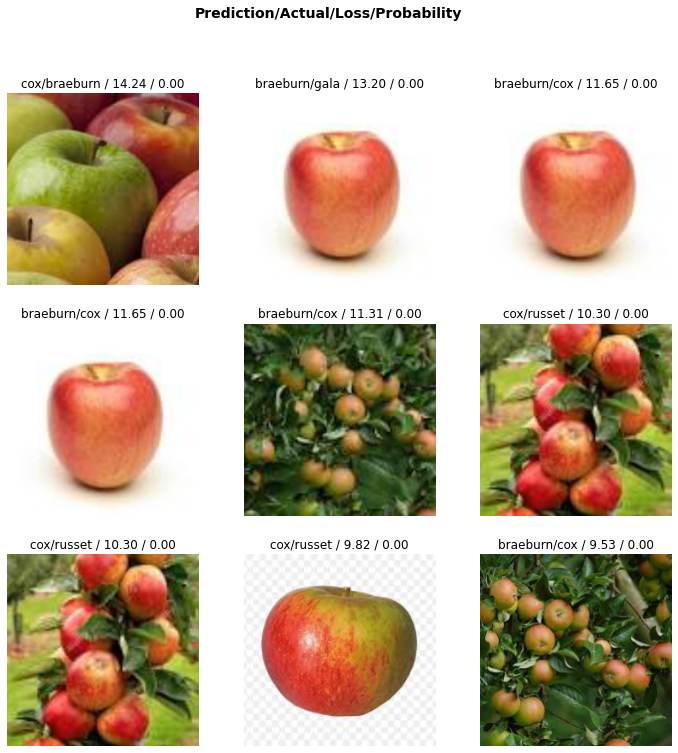

In [24]:
interp.plot_top_losses(9)